In [16]:
import numpy as np
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToPILImage, ToTensor, Compose
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.utils import make_grid


In [17]:

train_data = MNIST(root='./train_data/',download=True,train=True,transform=ToTensor())
test_data = MNIST(root='./test_data/', download=True, train=False,transform=ToTensor())



tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

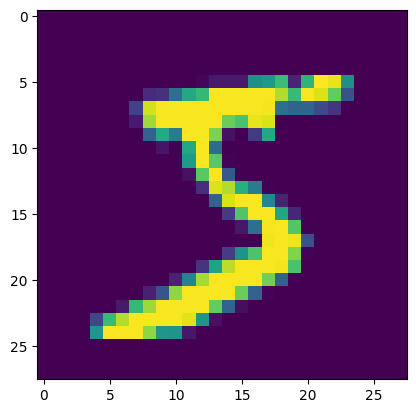

In [18]:
from PIL import Image
print(train_data.data[0])
# print(test_data)
# print(type(train_data))
img = train_data.data[0]
print(img.shape)
plt.imshow(img)


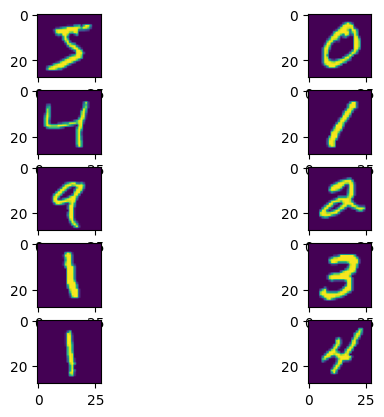

In [19]:
fig = plt.figure()
for i in range(10):
    img = train_data.data[i]
    plt.subplot(5, 2, i + 1)
    plt.imshow(img)

plt.show()

In [20]:
from torch.utils.data import DataLoader, Dataset

train_dataloader = DataLoader(train_data, shuffle=True, batch_size=1280, drop_last=True)
test_dataloader = DataLoader(test_data, shuffle=True, batch_size=1280)



In [22]:
import torch
import torch.nn as nn

class AlexNetMNIST(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNetMNIST, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 3 * 3, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 3 * 3)  
        x = self.classifier(x)
        return x


model = AlexNetMNIST()
print(model)

AlexNetMNIST(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=2304, out_features=1024, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=1024, out_features=512, bias=True)
    (5): ReLU(inplace=True

In [23]:
from torch.optim import Adam

opt = Adam(lr=0.001, params=model.parameters())


In [27]:
def train(model, opt, dataloader, EPOCH=100):
    
    model.train()
    loss_fn = nn.CrossEntropyLoss()
    
    for epoch in range(EPOCH):
        for batch_id, (img, label) in enumerate(dataloader):
            
            pred = model(img)
            loss = loss_fn(pred, label)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
            print(f"epoch:{epoch}, batch_id:{batch_id}, loss:{loss}")
            
            
    

In [26]:
train(model, opt, train_dataloader)

epoch:0, batch_id:0, loss:2.30338191986084
epoch:0, batch_id:1, loss:2.2995193004608154
epoch:0, batch_id:2, loss:2.295027017593384
epoch:0, batch_id:3, loss:2.2727150917053223
epoch:0, batch_id:4, loss:2.218201160430908
epoch:0, batch_id:5, loss:2.0887608528137207
epoch:0, batch_id:6, loss:1.9961025714874268
epoch:0, batch_id:7, loss:1.739483118057251
epoch:0, batch_id:8, loss:1.5077615976333618
epoch:0, batch_id:9, loss:1.3516650199890137
epoch:0, batch_id:10, loss:1.1729936599731445
epoch:0, batch_id:11, loss:1.0417287349700928


KeyboardInterrupt: 